### Feedforward neural network with back propagation with updation of weights.

- Input Layer: 4 neurons
- Hidden Layer: 3 neurons
- Output Layer: 1 neuron

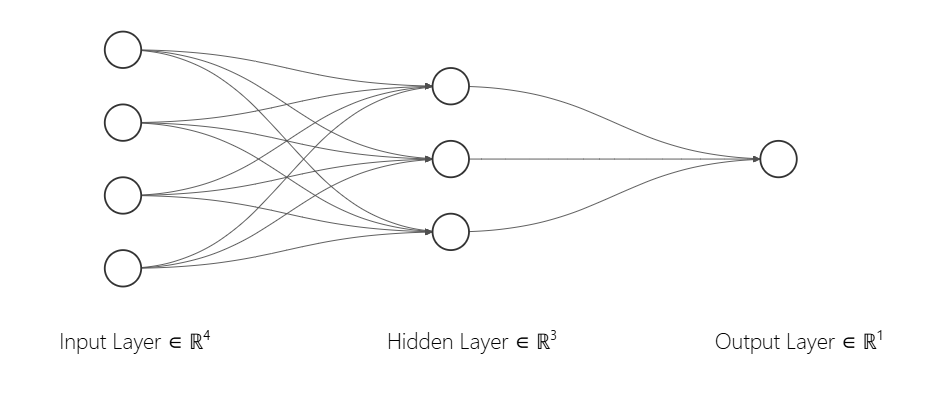

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_array = np.array([[1, 0, 1, 0], 
                        [1, 0, 1, 1], 
                        [0, 1, 0, 1]]).T
print(f"Input array with shape {input_array.shape}")
input_array

Input array with shape (4, 3)


array([[1, 1, 0],
       [0, 0, 1],
       [1, 1, 0],
       [0, 1, 1]])

In [3]:
true_labels = np.array([[1, 0, 0]])
print(f"True labels with shape {true_labels.shape}")

True labels with shape (1, 3)


In [4]:
input_layer_neurons = input_array.shape[0]
hidden_layer_neurons = 3
output_layer_neurons = 1

In [5]:
print("Randomly initialising the weights.")
weight_ih = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weight_ho = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))

Randomly initialising the weights.


In [6]:
print("Weights for input layer to hidden layer:\n", weight_ih, sep="")
print("\nWeights for hidden layer to output layer:\n", weight_ho, sep="")

Weights for input layer to hidden layer:
[[0.17196519 0.85860812 0.41158579]
 [0.15822467 0.34360911 0.0731054 ]
 [0.3239153  0.05961452 0.20323535]
 [0.45674804 0.03766309 0.96960011]]

Weights for hidden layer to output layer:
[[0.53199781]
 [0.1558323 ]
 [0.0926015 ]]


In [7]:
print("Shape of the weight arrays.")
print("Input - Hidden Layer Matrix", weight_ih.shape)
print("Hidden - Output Layer Matrix", weight_ho.shape)

Shape of the weight arrays.
Input - Hidden Layer Matrix (4, 3)
Hidden - Output Layer Matrix (3, 1)


### Implementing forward propagation.

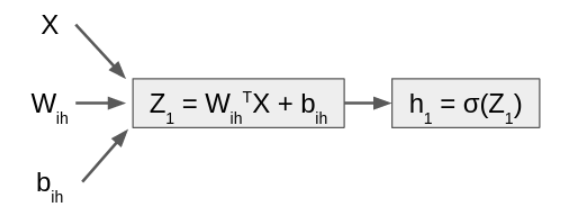

In [8]:
def sigmoid_activation(x):
    return 1/(1 + np.exp(-x))

In [9]:
hidden_layer_input = np.dot(weight_ih.T, input_array)
hidden_layer_activation = sigmoid_activation(hidden_layer_input)

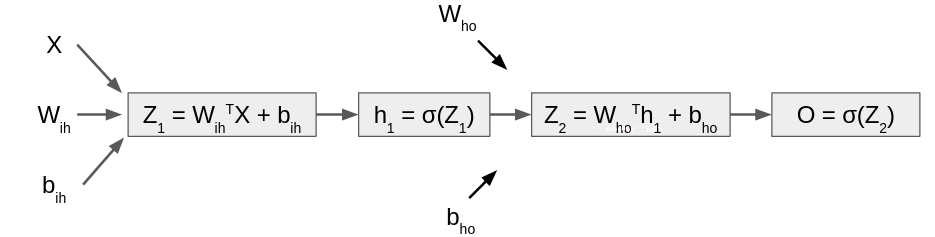

In [10]:
output_layer_input = np.dot(weight_ho.T, hidden_layer_activation)
output_after_activation = sigmoid_activation(output_layer_input)

In [11]:
output_after_activation

array([[0.62295365, 0.63952739, 0.62395407]])

### Implementing backward propagation.

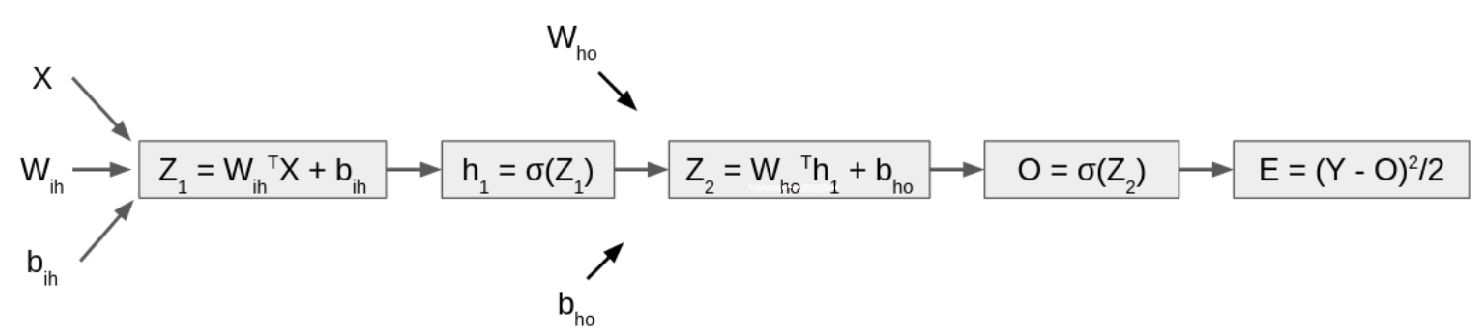

In [12]:
error = np.square(true_labels - output_after_activation) / 2
error

array([[0.07108198, 0.20449764, 0.19465934]])

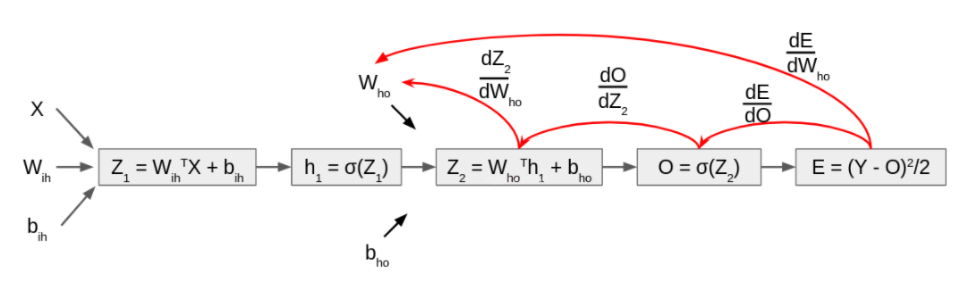

In [13]:
error_wrt_output = -(true_labels - output_after_activation)
print("Rate of change of error w.r.t output:", error_wrt_output)

Rate of change of error w.r.t output: [[-0.37704635  0.63952739  0.62395407]]


In [14]:
output_wrt_Z2 = np.multiply(output_after_activation, (1 - output_after_activation))
print("Rate of change of output w.r.t. Z2:", output_wrt_Z2)

Rate of change of output w.r.t. Z2: [[0.2348824  0.23053211 0.23463539]]


In [15]:
Z2_wrt_weight_ho = hidden_layer_activation
print("Rate of change of Z2 w.r.t. weights between hidden and output layer:\n", Z2_wrt_weight_ho)

Rate of change of Z2 w.r.t. weights between hidden and output layer:
 [[0.62149074 0.72164349 0.64907431]
 [0.71467982 0.7222973  0.59417991]
 [0.64903978 0.82982976 0.7393717 ]]


In [16]:
print("Checking shapes of partial derivatives")
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_weight_ho.shape

Checking shapes of partial derivatives


((1, 3), (1, 3), (3, 3))

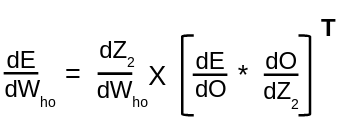

In [17]:
error_wrt_weight_ho = np.dot(Z2_wrt_weight_ho, (error_wrt_output * output_wrt_Z2).T)
print("Rate of change of error w.r.t weight between hidden and output layer:\n", error_wrt_weight_ho)

Rate of change of error w.r.t weight between hidden and output layer:
 [[0.14637845]
 [0.13018524]
 [0.17310843]]


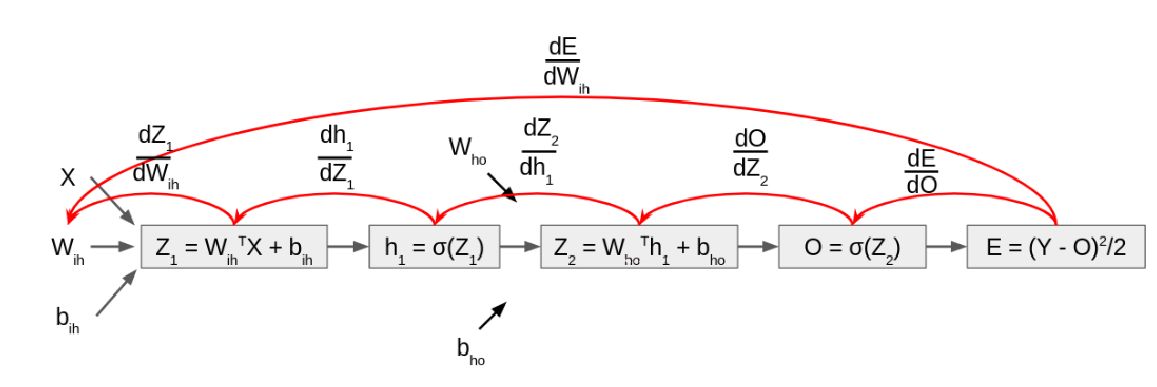

In [18]:
Z2_wrt_h1 = weight_ho
print("Rate of change of Z2 w.r.t. hidden layer activations:\n", Z2_wrt_h1)

Rate of change of Z2 w.r.t. hidden layer activations:
 [[0.53199781]
 [0.1558323 ]
 [0.0926015 ]]


In [19]:
h1_wrt_Z1 = np.multiply(hidden_layer_activation, (1 - hidden_layer_activation))
print("Rate of change of hidden layer activations w.r.t. Z1:\n", h1_wrt_Z1)

Rate of change of hidden layer activations w.r.t. Z1:
 [[0.23524    0.20087416 0.22777685]
 [0.20391258 0.20058391 0.24113015]
 [0.22778714 0.14121233 0.19270119]]


In [20]:
Z1_wrt_weight_ih = input_array
print("Rate of change of Z1 w.r.t. weights between input and hidden layer:\n", Z1_wrt_weight_ih)

Rate of change of Z1 w.r.t. weights between input and hidden layer:
 [[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]


In [21]:
print("Checking the shapes of partial derivatives:")
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_weight_ih.shape

Checking the shapes of partial derivatives:


((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

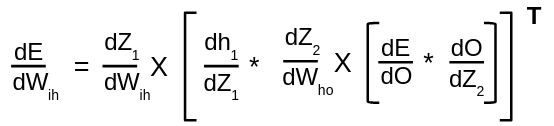

In [22]:
error_wrt_weight_ih = np.dot(Z1_wrt_weight_ih, (h1_wrt_Z1 * np.dot(Z2_wrt_h1, (output_wrt_Z2 * error_wrt_output))).T)
print("Rate of change of error w.r.t weights between input and hidden layer:\n", error_wrt_weight_ih)

Rate of change of error w.r.t weights between input and hidden layer:
 [[4.67199369e-03 1.79418951e-03 5.98183255e-05]
 [1.77404882e-02 5.50117087e-03 2.61245339e-03]
 [4.67199369e-03 1.79418951e-03 5.98183255e-05]
 [3.34957092e-02 1.01095070e-02 4.54033872e-03]]


### Updating parameters

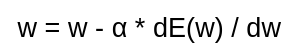

In [23]:
learning_rate = 0.01
weight_ho, weight_ih

(array([[0.53199781],
        [0.1558323 ],
        [0.0926015 ]]),
 array([[0.17196519, 0.85860812, 0.41158579],
        [0.15822467, 0.34360911, 0.0731054 ],
        [0.3239153 , 0.05961452, 0.20323535],
        [0.45674804, 0.03766309, 0.96960011]]))

In [24]:
weight_ho = weight_ho - learning_rate * error_wrt_weight_ho
weight_ih = weight_ih - learning_rate * error_wrt_weight_ih

weight_ho, weight_ih

(array([[0.53053403],
        [0.15453045],
        [0.09087041]]),
 array([[0.17191847, 0.85859017, 0.41158519],
        [0.15804727, 0.3435541 , 0.07307927],
        [0.32386858, 0.05959658, 0.20323475],
        [0.45641308, 0.037562  , 0.96955471]]))

### Training model for n epochs

In [25]:
input_layer_neurons = input_array.shape[0]
hidden_layer_neurons = 3
output_layer_neurons = 1

weight_ih = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weight_ho = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))

learning_rate = 0.01
epochs = 10000

In [26]:
error_for_epoch = []
for epoch_val in range(epochs):
    # 1. Forward propagation
    # Hidden layer activation
    hidden_layer_input = np.dot(weight_ih.T, input_array)
    hidden_layer_activation = sigmoid_activation(hidden_layer_input)
    # Calculating the output
    output_layer_input = np.dot(weight_ho.T, hidden_layer_activation)
    output_after_activation = sigmoid_activation(output_layer_input)
    
    # 2. Backward propagation.
    # Calculate error
    error = np.square(true_labels - output_after_activation) / 2
    error_wrt_output = -(true_labels - output_after_activation)
    output_wrt_Z2 = np.multiply(output_after_activation, (1 - output_after_activation))
    Z2_wrt_weight_ho = hidden_layer_activation
    
    # Rate of change of error w.r.t weight between hidden and output layer
    error_wrt_weight_ho = np.dot(Z2_wrt_weight_ho, (error_wrt_output * output_wrt_Z2).T)
    Z2_wrt_h1 = weight_ho
    h1_wrt_Z1 = np.multiply(hidden_layer_activation, (1 - hidden_layer_activation))
    Z1_wrt_weight_ih = input_array
    
    # Rate of change of error wrt weights between input and hidden layer
    error_wrt_weight_ih = np.dot(Z1_wrt_weight_ih, (h1_wrt_Z1 * np.dot(Z2_wrt_h1, (error_wrt_output * output_wrt_Z2))).T)
    
    # Updating the weights between hidden and output layer
    weight_ho = weight_ho - learning_rate * error_wrt_weight_ho
    # Updating the weights between input and hidden layer
    weight_ih = weight_ih - learning_rate * error_wrt_weight_ih
    
    # Appending error of each epoch
    error_for_epoch.append(np.average(error))

In [27]:
weight_ho, weight_ih

(array([[ 1.73993261],
        [-2.32267977],
        [-1.33565028]]),
 array([[ 1.06655853, -1.11521687, -0.59368861],
        [-0.23725483,  1.17363308,  0.61800415],
        [ 0.64665599, -0.35767472, -0.41041849],
        [-0.12324006,  2.37693991,  1.69582257]]))

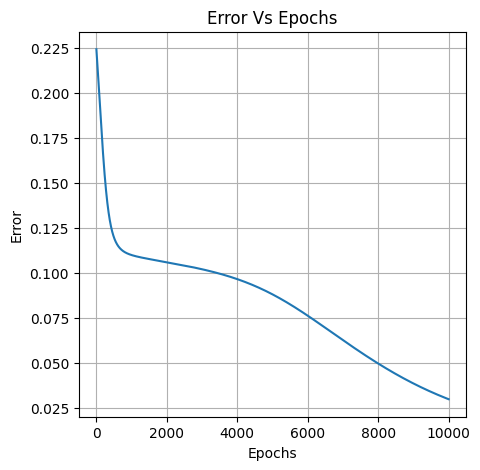

In [28]:
plt.figure(figsize=(5, 5))
plt.plot(np.arange(1, epochs + 1), np.array(error_for_epoch))
plt.title("Error Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid()
plt.show()

In [29]:
print("Final output from model", output_after_activation)

Final output from model [[0.66432839 0.25013553 0.05962835]]


In [30]:
print("Error at last epoch:", error)

Error at last epoch: [[0.05633772 0.03128389 0.00177777]]
